In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
base_data = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
base_data.shape

(110527, 14)

In [5]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:

base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [10]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

D:\Applications\Anaconda3\envs\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


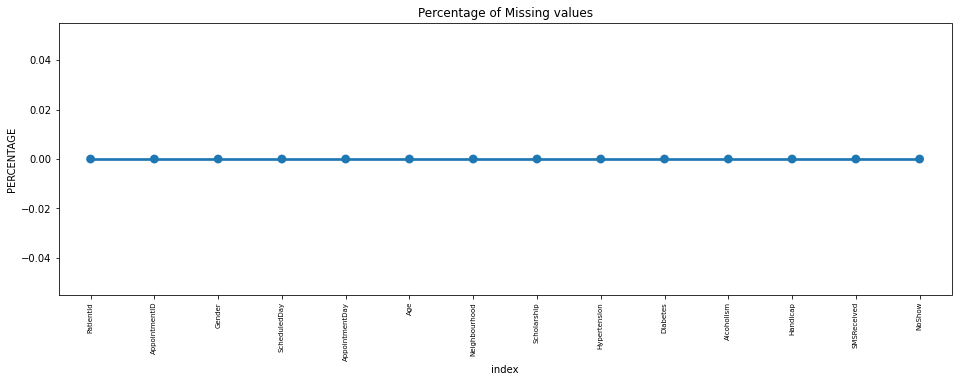

In [11]:
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [12]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [13]:
base_data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [14]:
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [15]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMSReceived     110527 non-null  int64         
 11  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [16]:
base_data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
for i in base_data.columns:
    print(i,'have')
    print(base_data[i].unique())
    print(base_data[i].value_counts())
    print('-'*60)

Gender have
['F' 'M']
F    71840
M    38687
Name: Gender, dtype: int64
------------------------------------------------------------
ScheduledDay have
['2016-04-29T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-04-20T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-04-18T00:00:00.000000000'
 '2016-04-11T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-04-15T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-04-05T00:00:00.000000000' '2016-04-08T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-07T00:00:00.000000000' '2016-03-17T00:00:00.000000000'
 '2016-03-30T00:00:00.000000000' '2016-03-29T00:00:00.000000000'
 '2016-03-18T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-04T00:00:00.000000000' '2016-03-15T00:00:00.000000000'
 '201

In [18]:
print("Patients with `Age` less than -1 -> {}".format(base_data[base_data.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 -> {}".format(base_data[base_data.Age == 0].shape[0]))

Patients with `Age` less than -1 -> 1
Patients with `Age` equal to 0 -> 3539


In [19]:
base_data = base_data[base_data.Age >= 0]

In [20]:
base_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow'],
      dtype='object')

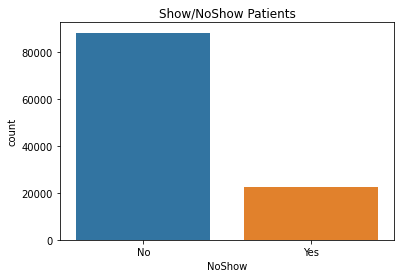

In [21]:
ax = sns.countplot(x=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow Patients")
plt.show()

In [22]:
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

No     79.806561
Yes    20.193439
Name: NoShow, dtype: float64

In [23]:
base_data['NoShow'].value_counts()

No     88207
Yes    22319
Name: NoShow, dtype: int64

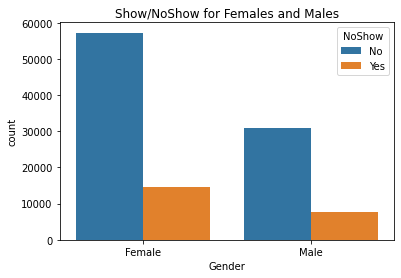

In [24]:
ax = sns.countplot(x=base_data.Gender, hue=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

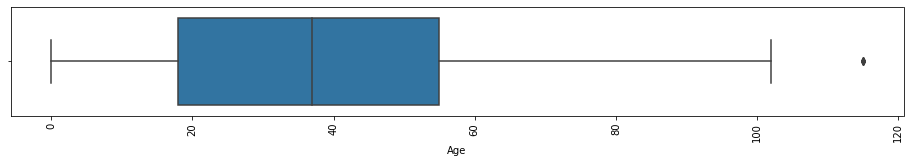

In [25]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=base_data.Age)

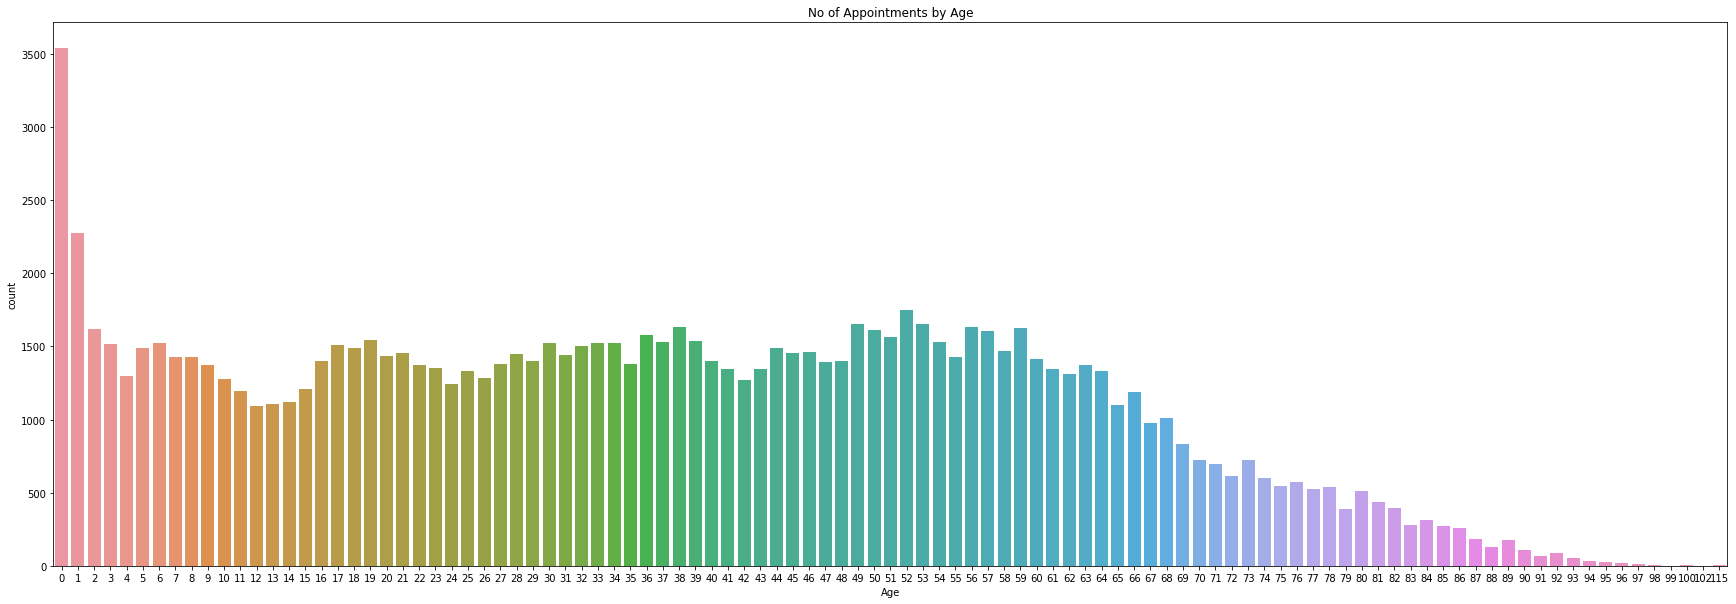

In [26]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x=base_data.Age)
ax.set_title("No of Appointments by Age")
plt.show()

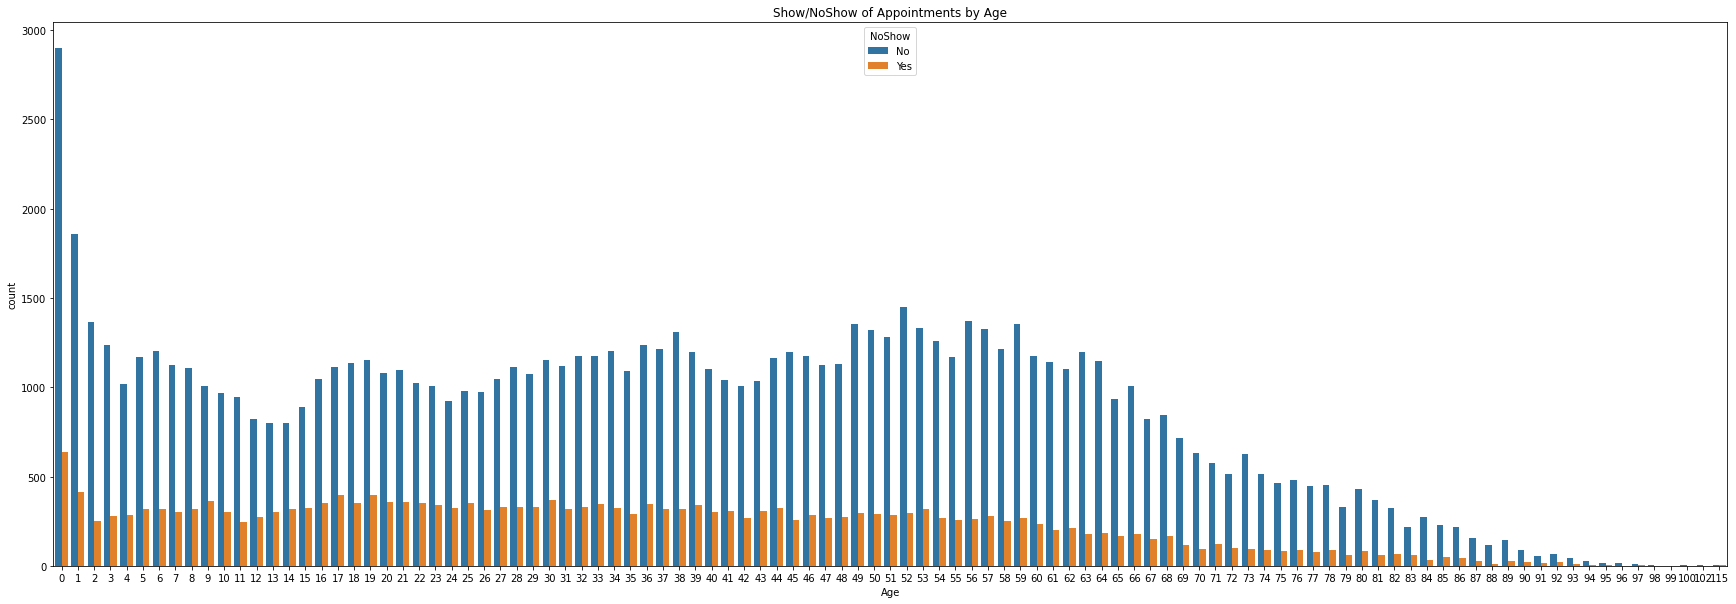

In [27]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x=base_data.Age, hue=base_data.NoShow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

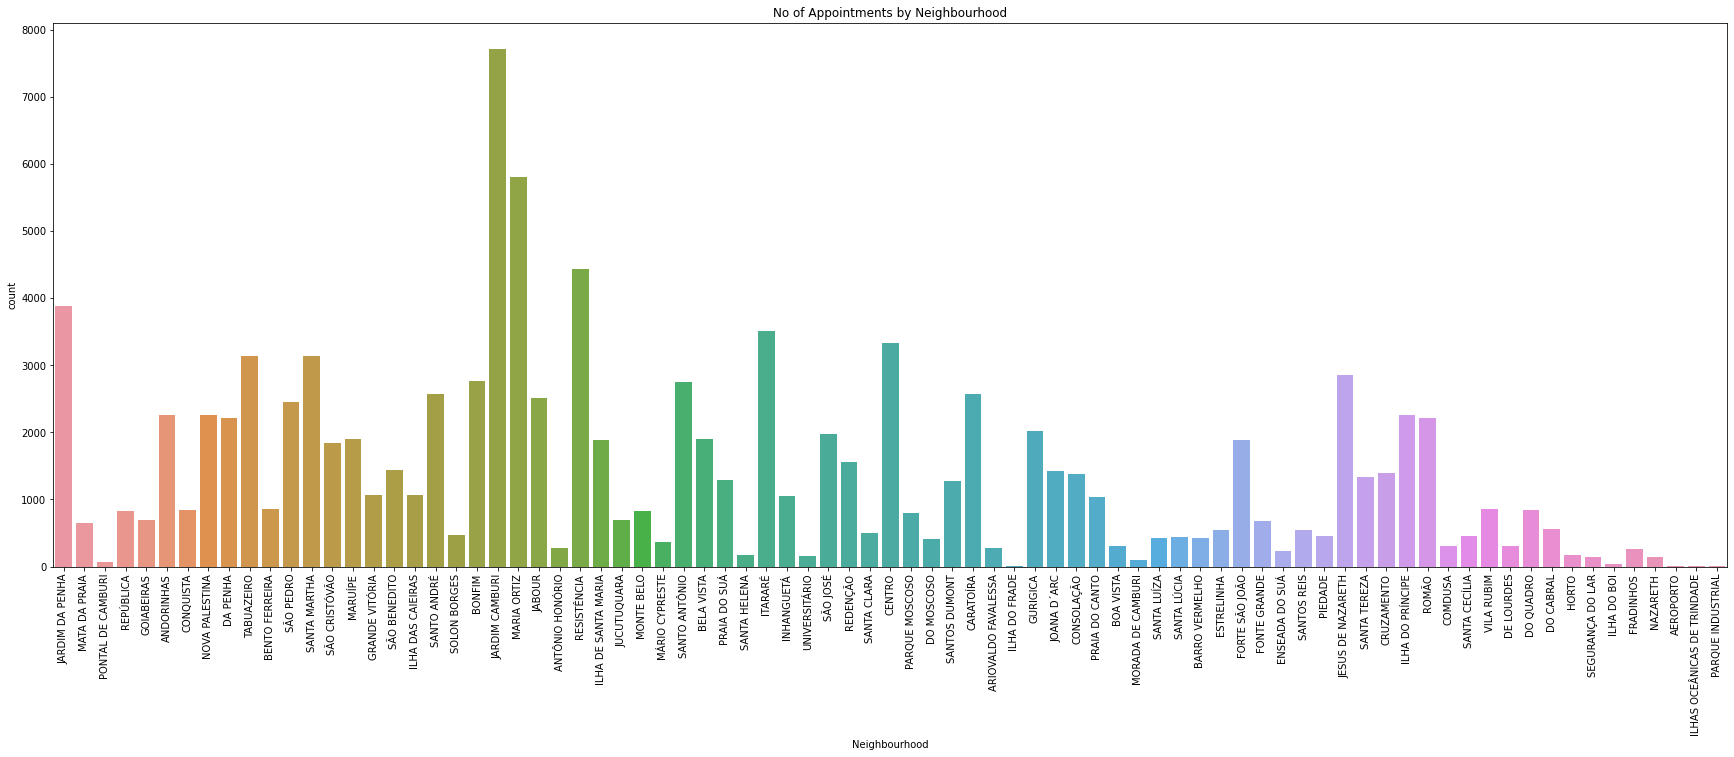

In [28]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
ax = sns.countplot(x=base_data.Neighbourhood)
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

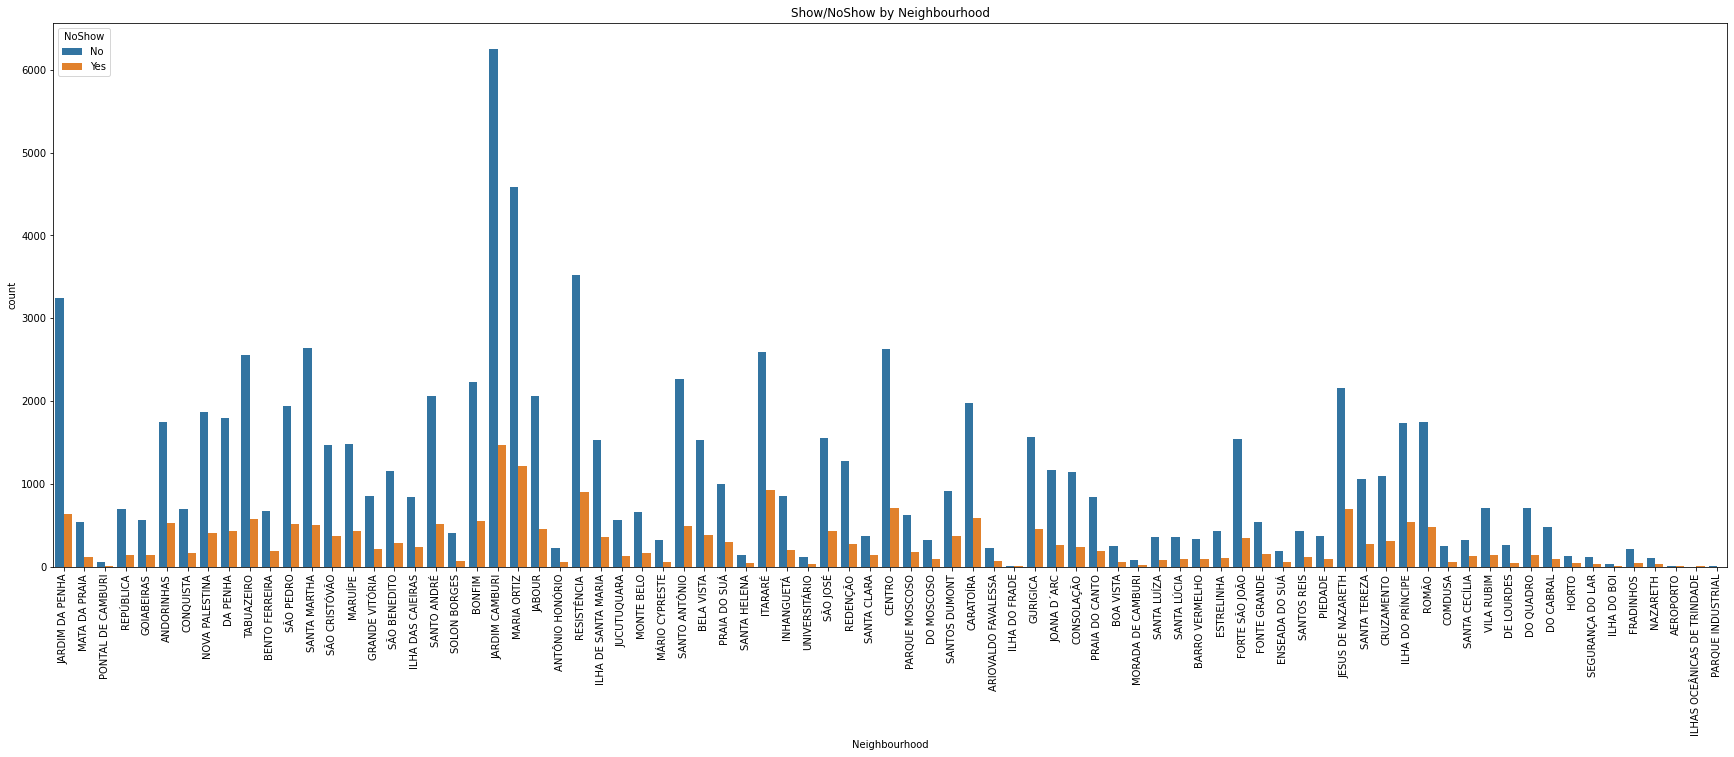

In [29]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
ax = sns.countplot(x=base_data.Neighbourhood, hue=base_data.NoShow)
ax.set_title("Show/NoShow by Neighbourhood")
plt.show()

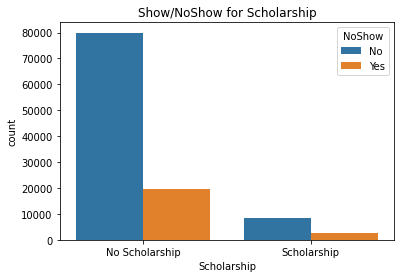

In [30]:
ax = sns.countplot(x=base_data.Scholarship, hue=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

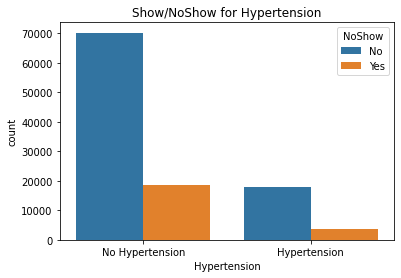

In [31]:
ax = sns.countplot(x=base_data.Hypertension, hue=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

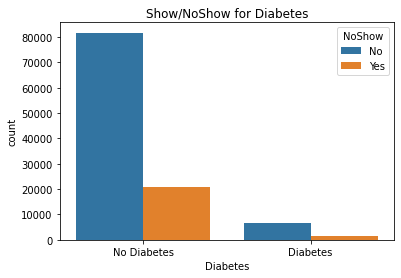

In [32]:
ax = sns.countplot(x=base_data.Diabetes, hue=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

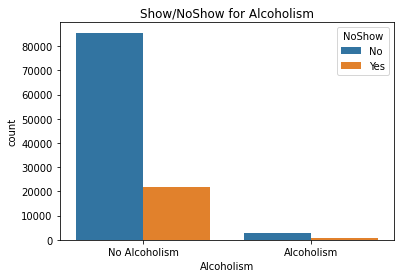

In [33]:
ax = sns.countplot(x=base_data.Alcoholism, hue=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

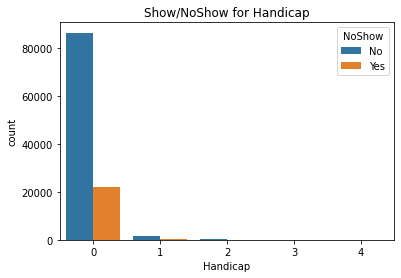

In [34]:
ax = sns.countplot(x=base_data.Handicap, hue=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow for Handicap")
plt.show()

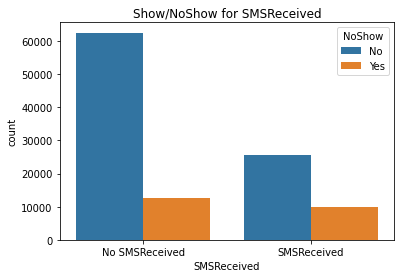

In [35]:
ax = sns.countplot(x=base_data.SMSReceived, hue=base_data.NoShow, data=base_data)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

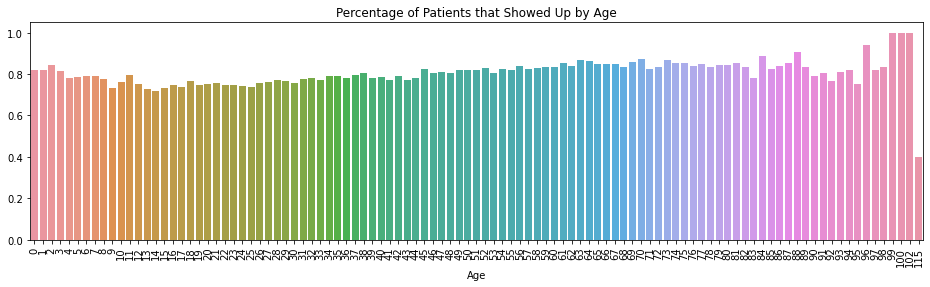

In [36]:
df_age_ratio = base_data[base_data.NoShow == 'No'].groupby(['Age']).size()/base_data.groupby(['Age']).size()
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.show()

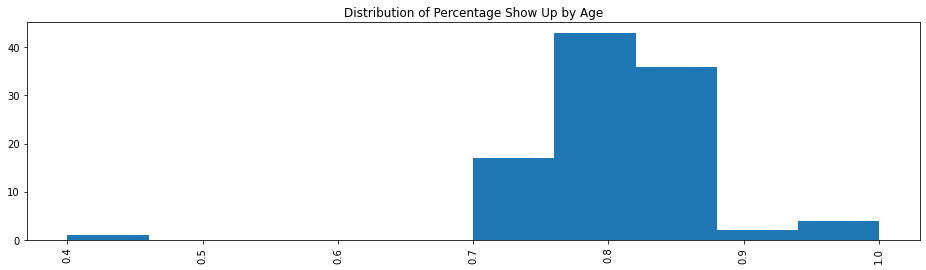

In [37]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

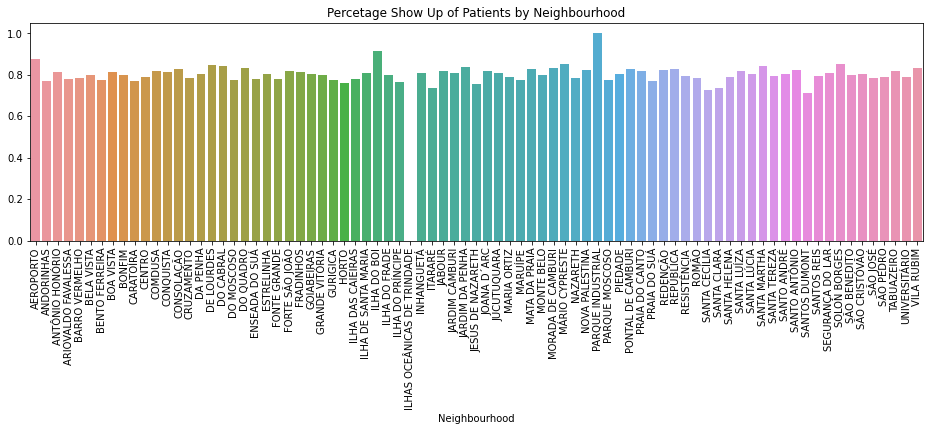

In [38]:
df_n_ratio = base_data[base_data.NoShow == 'No'].groupby(['Neighbourhood']).size()/base_data.groupby(['Neighbourhood']).size()
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_n_ratio.index, y=df_n_ratio)
ax.set_title("Percetage Show Up of Patients by Neighbourhood")
plt.show()

In [39]:
base_data['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

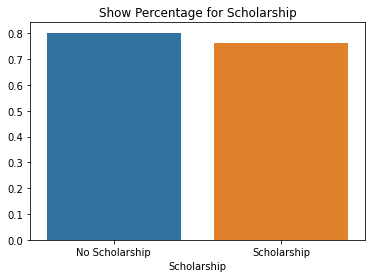

In [40]:
df_s_ratio = base_data[base_data.NoShow == 'No'].groupby(['Scholarship']).size()/base_data.groupby(['Scholarship']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio)
ax.set_title("Show Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [41]:
base_data['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

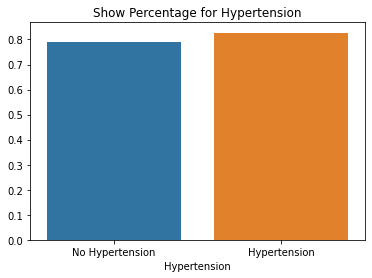

In [42]:
df_h_ratio = base_data[base_data.NoShow == 'No'].groupby(['Hypertension']).size()/base_data.groupby(['Hypertension']).size()
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio)
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [43]:
base_data['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

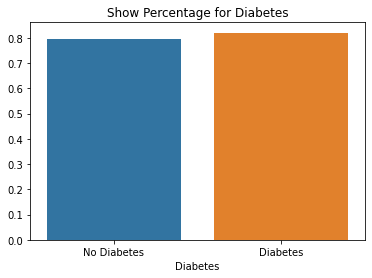

In [44]:
df_d_ratio = base_data[base_data.NoShow == 'No'].groupby(['Diabetes']).size()/base_data.groupby(['Diabetes']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio)
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [45]:
base_data['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

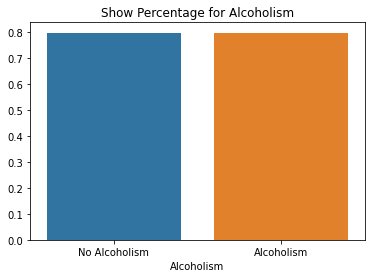

In [46]:
df_a_ratio = base_data[base_data.NoShow == 'No'].groupby(['Alcoholism']).size()/base_data.groupby(['Alcoholism']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio)
ax.set_title("Show Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [47]:
base_data['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

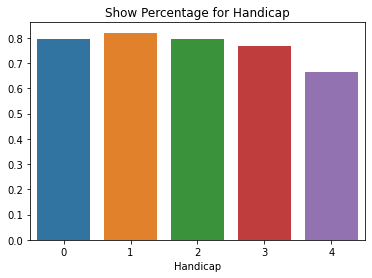

In [48]:
df_ha_ratio = base_data[base_data.NoShow == 'No'].groupby(['Handicap']).size()/base_data.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio)
ax.set_title("Show Percentage for Handicap")
plt.show()

In [49]:
base_data['SMSReceived'].value_counts()

0    75044
1    35482
Name: SMSReceived, dtype: int64

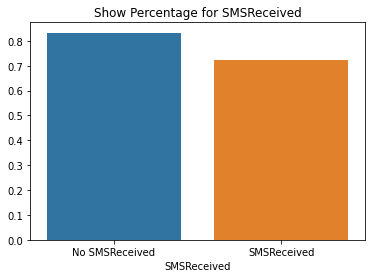

In [50]:
df_s_ratio = base_data[base_data.NoShow == 'No'].groupby(['SMSReceived']).size()/base_data.groupby(['SMSReceived']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio)
ax.set_title("Show Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [51]:
base_data['ScheduledDay_DOW'].value_counts()

KeyError: 'ScheduledDay_DOW'

In [ ]:
base_data['AppointmentDay_DOW'].value_counts()

In [ ]:
base_data['ScheduledDay_DOW'] = base_data['ScheduledDay'].dt.day_name()
base_data['AppointmentDay_DOW'] = base_data['AppointmentDay'].dt.day_name()

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=base_data.ScheduledDay_DOW, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=base_data.AppointmentDay_DOW, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

In [ ]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=base_data.AppointmentDay_DOW, hue=base_data.NoShow, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

In [ ]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [ ]:
base_data

# Finding:

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 100,000 patients without Scholarship and out of them around 80% have come for the visit and out of the 10,500 patients with Scholarship around 75% of them have come for the visit.
5. there are around 88,000 patients without Hypertension and out of them around 78% have come for the visit and Out of the 22,500 patients with Hypertension around 85% of them have come for the visit.
6. there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit and oOut of the 8,500 patients with Diabetes around 83% of them have come for the visit.
7. there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,500 patients who have received SMS around 72% of them have come for the visit. 
8. there is no appointments on sunday and on saturday appointments are very less in comparision to other week days 
